In [663]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [664]:
im = cv2.imread('./images/mountain.jpg', cv2.IMREAD_COLOR)
im_gray = cv2.imread('./images/mountain.jpg', cv2.IMREAD_GRAYSCALE)

In [665]:
def get_gauss_pyramid(im, l=4, sub=2, smoothing=1.0):
    res = [im]
    
    for i in range(l):
        tmp = cv2.GaussianBlur(im, (0,0), smoothing)
        tmp = cv2.resize(im, (0,0), fx=1/sub, fy=1/sub)
        res.append(tmp)
        im = tmp
    
    return res

In [666]:
def window_func(x, y, s):
    return np.exp(-(x**2 + y**2)/(2*s**2))

In [667]:
def get_harris_matrix(im, si=1.5, sd=1, k=0.04):
    h, w = im.shape[0], im.shape[1]
    prod = []
    
    Iy, Ix = np.gradient(im)
    
    Ix2 = np.square(Ix)
    Iy2 = np.square(Iy)
    Ixy = Ix * Iy
    
    Sx2 = cv2.GaussianBlur(Ix2, (3, 3), si)
    Sy2 = cv2.GaussianBlur(Iy2, (3, 3), si)
    Sxy = cv2.GaussianBlur(Ixy, (3, 3), si)
    
    detM = (Sx2 * Sy2) - (np.square(Sxy))
    trM = Sx2 + Sy2

    R = detM - k * (np.square(trM))
        
    return R, Sx2, Sy2, Sxy

In [668]:
def get_corner_strength(Sx2, Sy2, Sxy):
    res = []
    
    H = []
    
    for i in range(Sx2.shape[0]):
        tmp = []
        for j in range(Sx2.shape[1]):
            tmp.append(np.array([
                [Sx2[i, j], Sxy[i, j]],
                [Sxy[i, j], Sy2[i, j]],
            ]))
        H.append(tmp)
    
    H = np.array(H)
        
    for i in range(H.shape[0]):
        tmp = []
        for j in range(H.shape[1]):
            det = np.linalg.det(H[i, j])
            trace = np.trace(H[i, j])
            if trace == 0:
                tmp.append(0)
            else:
                tmp.append(det/trace)
        res.append(tmp)
        
    return H, np.array(res)

In [669]:
def get_local_max(im, loc, n=3, threshold=10.0):
    r, c = loc[0], loc[1]
    res = (None, None)
    c_max = im[r, c]
    
    for i in range(-1, 1):
        for j in range(-1, 1):
            try:
                if im[r+i][c+j] > c_max:
                    c_max = im[r+i][c+j]
                    res = (r+i, c+j)
            except:
                continue
                
    if c_max > threshold:
        return res
    
    return

In [670]:
def get_maxima(im, threshold=10.0):
    h, w = im.shape[0], im.shape[1]
    res = []
    
    for i in range(0, h, 3):
        for j in range(0, w, 3):
            res.append(get_local_max(im, (i, j)))
    
    return res

In [671]:
cur_img = im_pyramid[1]

In [672]:
im_pyramid = get_gauss_pyramid(im_gray)

In [673]:
R, Sx2, Sy2, Sxy = get_harris_matrix(cur_img)

In [674]:
def get_max_R(R, thresold=0.1):
    localMax = np.ones(R.shape, dtype=np.uint8)
    localMax[R <= np.max(R) * 0.1] = 0
    
    maxima = []
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            if localMax[i, j] == 1:
                maxima.append((j, i))
    
    return maxima

In [675]:
test_img = cur_img.copy()

In [676]:
maxima = get_max_R(R)

In [677]:
for p in maxima:
    test_img = cv2.circle(test_img, p, 2, (0, 0, 255), 2)

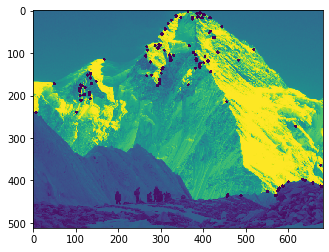

In [678]:
plt.imshow(test_img)

In [679]:
cv2.imwrite("test.png", test_img)

True